# Lecture 2

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# Size of training images
print(train_images.shape)

# Size of training labels
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [17]:
# Size of training images
print(test_images.shape)

# Size of training labels
print(test_labels.shape)

(10000, 28, 28)
(10000,)


## Build first model

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([layers.Dense(512,activation="relu"),layers.Dense(10,activation="softmax")])

Metal device set to: Apple M1


2022-01-27 11:52:46.726907: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-27 11:52:46.727877: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [20]:
model.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

Prepare Image Data

In [21]:
train_images = train_images.reshape((60000, 28 * 28)) #Flatting 2 dim image data to vector
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

"Fitting the Model"

In [22]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

2022-01-27 11:22:48.184241: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/5


2022-01-27 11:22:48.540308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 3s 5ms/step - loss: 0.2534 - accuracy: 0.9266
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1037 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0681 - accuracy: 0.9802
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0500 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0377 - accuracy: 0.9886


Test on the first 10 images of the testing set

In [ ]:
test_digits = test_images[0:10] # Select first 10 images
predictions = model.predict(test_digits) # Make prediction

In [31]:
# See prediction of first 
print(predictions[0]) #See predicited probability of image being in one class
print(predictions[0].argmax())
print(predictions[0][7]) #Probability of sample coming from the class 7

[4.0088839e-09 4.5739597e-12 4.7904341e-06 5.2227559e-05 6.7247362e-12
 5.2683674e-07 2.3258416e-13 9.9993360e-01 2.2330471e-07 8.6711434e-06]
7
0.9999336


In [30]:
print(test_labels[0]) #Ground truth value matches prediction 

7


Evaluate the model on the test set

In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

 16/313 [>.............................] - ETA: 1s - loss: 0.0448 - accuracy: 0.9863  

2022-01-27 11:37:19.922244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step - loss: 0.0659 - accuracy: 0.9798
test_acc: 0.9798000454902649


Observe the testing accuracy (0.9798) is less than that of the training accuracy (0.9886) and the tresting  and loss (0.0659) is greater than the training loss (0.0377) as expected. 

## Numpy Primer

In [33]:
import numpy as np

Tensor is a d dimensional array
* Rank = # of dimensions = # of axes 
* d = 0,1,2,3...

In [37]:
# Scalar is rank 0
x = np.array(12)
print(x.ndim)

0


In [38]:
# Vector is rank 1
x = np.array([12, 3, 6, 14, 7])
print(x.ndim)

1


In [40]:
# Matrix is rank 3
x = np.array([[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],])
print(x.ndim)

2


## Display the 4th digit

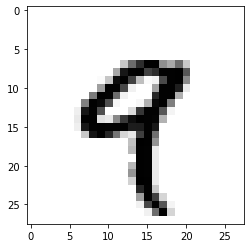

9

In [5]:
import matplotlib.pyplot as plt
digit = train_images[4] 
plt.imshow(digit, cmap=plt.cm.binary) 
plt.show()
train_labels[4]

## Manipulating Tensors

In [9]:
my_slice = train_images[10:100]
print(my_slice.shape)
my_slice = train_images[10:100, :, :]
print(my_slice.shape)

(90, 28, 28)
(90, 28, 28)


In [10]:
my_slice = train_images[10:100, 0:28, 0:28] 
my_slice.shape

(90, 28, 28)

In [11]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [12]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

In [15]:

test_labels[0:100].count(0)

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [ ]:
t